# **Project Machine Learning : Prediksi Penyakit Diabetes**

## **Objective:**   
Membangun sebuah model Machine Learning yang dapat memprediksi Penyakit Diabetes.

## **Sumber Dataset**
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp?select=diabetes_prediction_dataset.csv

# **Import Library**

In [1]:
!pip install packaging>=22.0
!pip install numpy==1.26.0
!pip install tensorflow==2.12.0
!pip install google protobuf
!pip install h5py>=3.10.0 protobuf>=3.20.3,<5.0.0dev
!pip install scikit-learn

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you 

/bin/bash: line 1: 5.0.0dev: No such file or directory


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik
sns.set(style="whitegrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**

In [4]:
# Memuat dataset dari path lengkap
data = pd.read_csv('/content/drive/MyDrive/dataset/diabetes_prediction_dataset.csv')

# Menampilkan 5 baris pertama data untuk memahami strukturnya
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Statistik deskriptif
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# **Data Understanding**
Dataset Diabetes Prediction Dataset yang digunakan dalam proyek ini berisi beberapa informasi kesehatan yang penting untuk memprediksi risiko diabetes pada individu. Data ini mencakup faktor-faktor seperti usia, tekanan darah, riwayat merokok, dan kadar glukosa darah, yang semuanya memiliki hubungan erat dengan risiko diabetes.
##Informasi Dataset
  - asfdsJumlah Data: (100.000 sampel)
  - Jumlah Fitur: 8 fitur prediktor dan 1 target (label)
  
##Deskripsi Fitur
Berikut adalah penjelasan setiap fitur dalam dataset :

  1. Gender: Jenis kelamin individu. Meskipun diabetes dapat menyerang siapa saja, beberapa studi menunjukkan perbedaan risiko antara pria dan wanita. Wanita dengan riwayat diabetes gestasional (diabetes selama kehamilan) berisiko lebih tinggi mengalami diabetes tipe 2.

  2. Age (Usia): Risiko diabetes meningkat seiring bertambahnya usia. Faktor-faktor seperti berkurangnya aktivitas fisik, perubahan hormonal, dan peningkatan risiko kondisi kesehatan lainnya berkontribusi terhadap risiko diabetes pada usia lanjut.

  3. Hypertension (Hipertensi): Hipertensi atau tekanan darah tinggi adalah kondisi yang sering terjadi bersamaan dengan diabetes. Tekanan darah tinggi dapat memperburuk kondisi diabetes dan meningkatkan risiko komplikasi serius, terutama pada sistem kardiovaskular.

  4. Heart Disease (Penyakit Jantung): Penyakit jantung, seperti penyakit arteri koroner, memiliki hubungan erat dengan diabetes. Keduanya berbagi banyak faktor risiko yang sama seperti obesitas dan hipertensi, sehingga memiliki salah satu kondisi ini dapat meningkatkan risiko yang lain.

  5. Smoking History (Riwayat Merokok): Merokok adalah faktor risiko yang signifikan untuk diabetes tipe 2. Merokok dapat menyebabkan resistensi insulin dan mengganggu metabolisme glukosa. Berhenti merokok dapat mengurangi risiko komplikasi diabetes secara signifikan.
  
  6. BMI (Body Mass Index): BMI adalah indikator lemak tubuh yang dihitung berdasarkan tinggi dan berat badan. BMI yang tinggi berkaitan erat dengan obesitas, yang merupakan faktor risiko utama untuk diabetes tipe 2. Lemak berlebih, terutama di sekitar pinggang, dapat menyebabkan resistensi insulin dan mengganggu kontrol gula darah.

  7. HbA1c Level: HbA1c (hemoglobin terglikasi) adalah ukuran rata-rata kadar glukosa darah dalam 2-3 bulan terakhir. Kadar HbA1c yang tinggi menunjukkan kontrol gula darah yang buruk dan berkaitan dengan peningkatan risiko komplikasi diabetes. HbA1c sering digunakan sebagai indikator utama dalam diagnosis diabetes.

  8. Blood Glucose Level (Kadar Gula Darah): Kadar glukosa darah adalah jumlah glukosa (gula) dalam darah pada saat tertentu. Kadar glukosa yang tinggi, terutama dalam kondisi puasa atau setelah makan, menunjukkan gangguan regulasi glukosa yang merupakan tanda awal diabetes.

  9. Diabetes (Target): Variabel target untuk klasifikasi. Nilai 1 menunjukkan bahwa individu memiliki diabetes, sedangkan 0 menunjukkan bahwa individu tidak memiliki diabetes.

In [7]:
# Mengecek apakah ada missing values didalam nya
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **Exploratory Data Analysis (EDA)**
Untuk memahami distribusi fitur dan pola yang ada dalam data, dilakukan beberapa analisis data eksploratif, termasuk visualisasi distribusi data untuk fitur utama.

##Visualisasi Distribusi Usia
Grafik berikut menunjukkan distribusi usia pada dataset yang digunakan. Visualisasi ini dibuat menggunakan histogram untuk frekuensi dan garis KDE (Kernel Density Estimate) untuk menggambarkan pola distribusi data.

##Interpretasi
 - Puncak Distribusi: Terdapat puncak distribusi pada usia sekitar 50-60 tahun, menunjukkan bahwa kelompok usia tersebut memiliki jumlah yang signifikan dalam dataset.
 - Distribusi yang Tidak Rata: Jumlah data meningkat secara bertahap dari usia muda hingga dewasa, dengan penurunan setelah usia 60 tahun.
 - Frekuensi Tertinggi: Kelompok usia 80 tahun memiliki frekuensi tertinggi, yang kemungkinan disebabkan oleh adanya bias pengumpulan data.

##Kesimpulan
Distribusi ini memberikan wawasan awal tentang rentang usia pasien dalam dataset. Informasi ini penting untuk memastikan bahwa model machine learning yang dibangun mampu menangkap pola risiko diabetes di berbagai kelompok usia. Langkah selanjutnya adalah menganalisis hubungan antara usia dan target variabel diabetes untuk memahami lebih lanjut pengaruh usia terhadap diabetes.

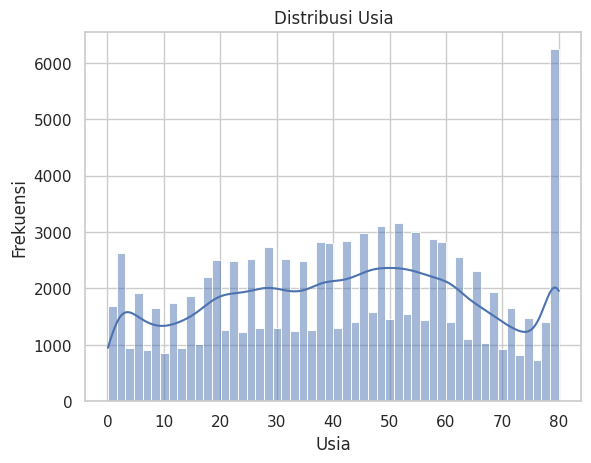

In [8]:
# Visualisasi distribusi pada usia
sns.histplot(data['age'], kde=True)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

# **Visualisasi Distribusi Body Mass Index (BMI)**
Grafik berikut menunjukkan distribusi Body Mass Index (BMI) pada dataset yang digunakan. Histogram dan garis Kernel Density Estimate (KDE) digunakan untuk memvisualisasikan distribusi data BMI.

##Interpretasi
 - Puncak Distribusi: Sebagian besar data BMI berkisar antara 20 hingga 30, yang mencerminkan kategori BMI normal hingga overweight berdasarkan standar WHO.
 - Distribusi yang Tidak Merata: Frekuensi sangat tinggi pada satu rentang nilai tertentu (di sekitar BMI 25), yang menunjukkan konsentrasi data pada kategori tersebut.
 - Anomali: Ada nilai BMI yang berada di atas 60, meskipun sangat jarang, yang perlu diperiksa lebih lanjut karena berpotensi merupakan outlier atau data anomali.

##Kesimpulan
Distribusi BMI ini memberikan informasi penting tentang proporsi pasien dengan berat badan normal, overweight, atau obesitas, yang merupakan faktor risiko utama untuk diabetes. Langkah selanjutnya adalah menganalisis hubungan BMI dengan target variabel diabetes untuk melihat pengaruhnya secara langsung.

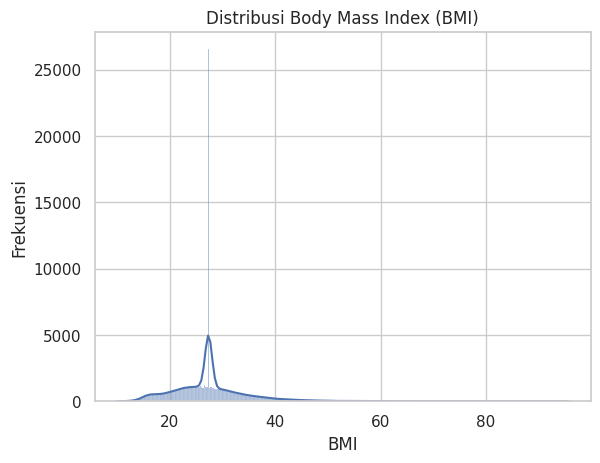

In [9]:
# Visualisasi distribusi pada BMI
sns.histplot(data['bmi'], kde=True)
plt.title("Distribusi Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

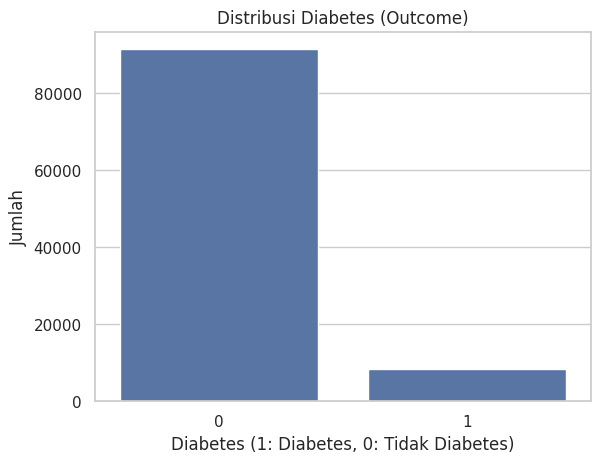

In [10]:
# Visualisasi distribusi pada diabetes
sns.countplot(x='diabetes', data=data)
plt.title("Distribusi Diabetes (Outcome)")
plt.xlabel("Diabetes (1: Diabetes, 0: Tidak Diabetes)")
plt.ylabel("Jumlah")
plt.show()

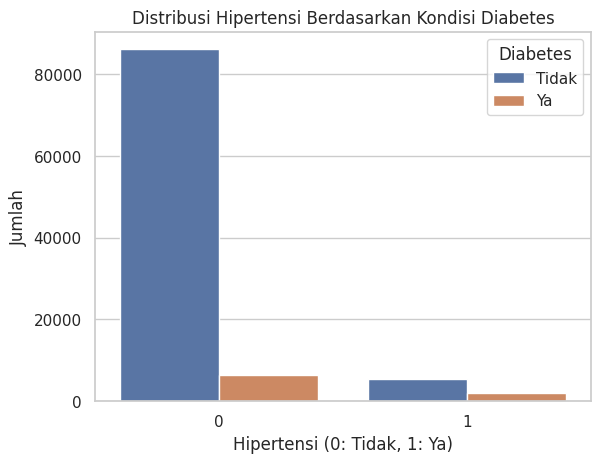

In [11]:
# Visualisasi pada hubungan hipertensi dan diabetes
sns.countplot(x='hypertension', hue='diabetes', data=data)
plt.title("Distribusi Hipertensi Berdasarkan Kondisi Diabetes")
plt.xlabel("Hipertensi (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah")
plt.legend(title="Diabetes", labels=["Tidak", "Ya"])
plt.show()

# **Visualisasi Matriks Korelasi**
Grafik berikut menunjukkan Matriks Korelasi antara fitur-fitur pada dataset. Matriks korelasi membantu dalam memahami hubungan linier antara variabel-variabel independen dan variabel target (diabetes).

##Interpretasi
- Hubungan dengan Variabel diabetes:

  - HbA1c_level memiliki korelasi tertinggi dengan diabetes (0.40), menunjukkan bahwa kadar HbA1c sangat relevan dalam menentukan risiko diabetes.
  - blood_glucose_level juga menunjukkan korelasi kuat (0.42) dengan diabetes, menandakan hubungan penting antara kadar gula darah dan penyakit diabetes.
  - Variabel seperti age, hypertension, dan bmi memiliki korelasi moderat dengan diabetes (masing-masing 0.26, 0.20, dan 0.21).
- Hubungan Antar Variabel Independen:

  - age dan bmi menunjukkan korelasi moderat (0.34), yang menunjukkan bahwa usia mungkin memengaruhi indeks massa tubuh pasien.
  - Korelasi antar fitur lainnya rendah, sehingga menunjukkan adanya hubungan yang lemah atau tidak signifikan.

##Kesimpulan
Matriks korelasi mengidentifikasi fitur-fitur penting seperti HbA1c_level dan blood_glucose_level, yang memiliki hubungan signifikan dengan diabetes.Fitur-fitur ini dapat diutamakan untuk membangun model prediksi yang lebih akurat.Tidak ditemukan multikolinearitas yang signifikan antar variabel independen, sehingga semua fitur dapat digunakan tanpa masalah redundansi data.

Visualisasi matriks korelasi ini sangat penting dalam tahapan Data Understanding untuk memilih fitur yang relevan dan mengurangi fitur yang tidak berkontribusi signifikan terhadap variabel target.

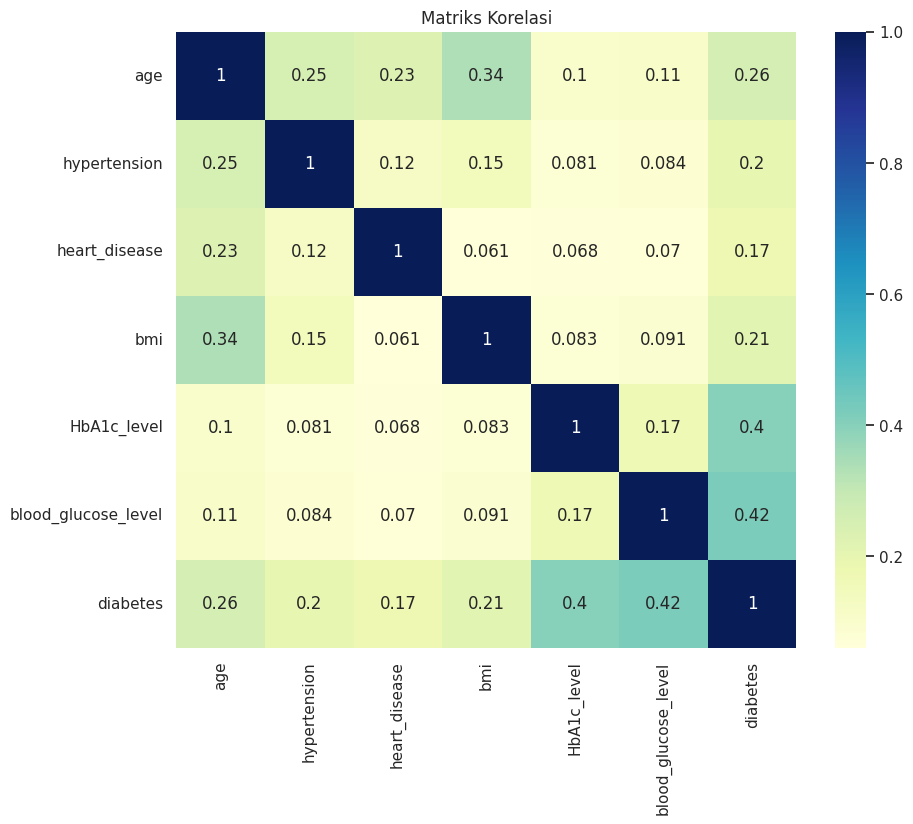

In [12]:
# Mengambil data hanya pada kolom numerik untuk perhitungan korelasi
numeric_data = data.select_dtypes(include=[float, int])

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

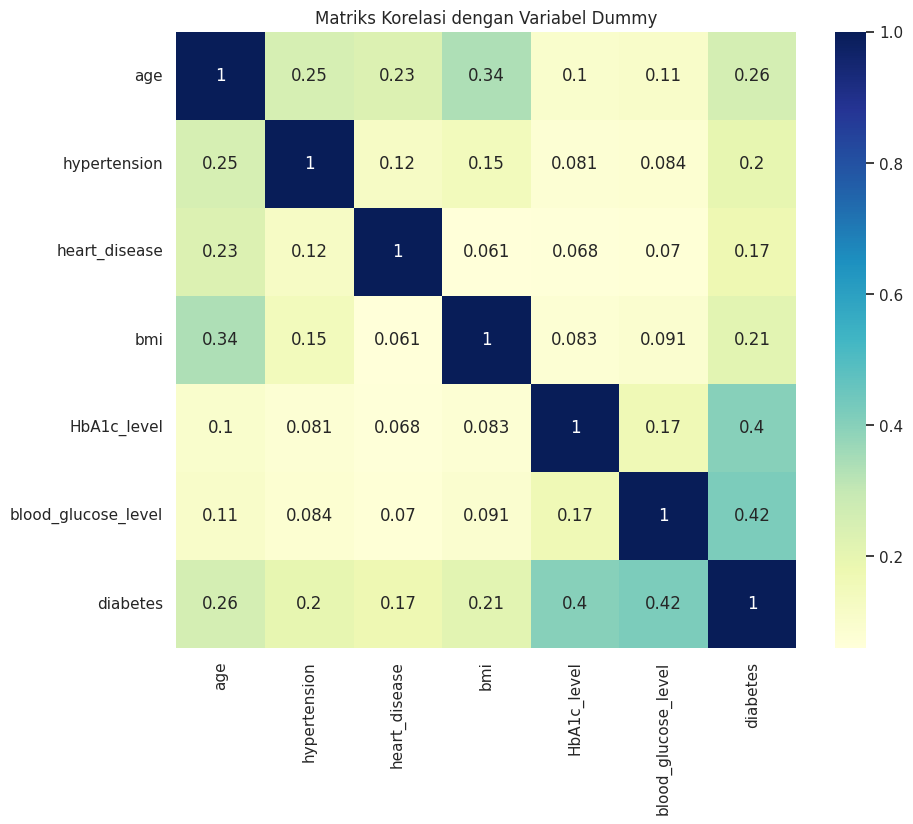

In [13]:
# Mengonversi kolom kategori menjadi variabel dummy
data_encoded = pd.get_dummies(data, columns=['gender'], drop_first=True)

# Mengambil hanya kolom numerik
numeric_data = data_encoded.select_dtypes(include=[float, int])

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi dengan Variabel Dummy")
plt.show()

# **Data Preparation**
Pada tahap ini, akan melakukan persiapan data dengan beberapa langkah, termasuk menangani nilai-nilai yang hilang, mengonversi variabel kategori menjadi numerik, dan normalisasi. Tujuan dari tahap ini adalah untuk memastikan data dalam kondisi siap untuk proses pemodelan machine learning.

In [14]:
# Mengonversi kolom kategori menjadi variabel dummy
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

In [15]:
# Memisahkan fitur (X) dan target (y)
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

##Normalisasi

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menerapkan normalisasi pada fitur numerik
X_scaled = scaler.fit_transform(X)

# Jika ingin hasilnya dalam bentuk DataFrame kembali
X = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Melihat beberapa baris pertama dari data yang telah diproses
data_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [19]:
# Melihat data setelah normalisasi
pd.DataFrame(X_scaled, columns=X.columns).head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Memeriksa bentuk data latih dan data uji
print("Data latih (X_train):", X_train.shape)
print("Data uji (X_test):", X_test.shape)
print("Target latih (y_train):", y_train.shape)
print("Target uji (y_test):", y_test.shape)

Data latih (X_train): (80000, 13)
Data uji (X_test): (20000, 13)
Target latih (y_train): (80000,)
Target uji (y_test): (20000,)


In [21]:
# Melihat distribusi target pada data latih dan data uji
print("Distribusi target pada data latih:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target pada data uji:")
print(y_test.value_counts(normalize=True))

Distribusi target pada data latih:
diabetes
0    0.9151
1    0.0849
Name: proportion, dtype: float64

Distribusi target pada data uji:
diabetes
0    0.9146
1    0.0854
Name: proportion, dtype: float64


#**Model Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi dan pelatihan model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Prediksi dengan Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

# Evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"Logistic Regression - Akurasi: {accuracy_logreg:.2f}, F1 Score: {f1_logreg:.2f}")

Logistic Regression - Akurasi: 0.96, F1 Score: 0.72


#**Model Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan pelatihan model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Akurasi: {accuracy_rf:.2f}, F1 Score: {f1_rf:.2f}")

Random Forest - Akurasi: 0.97, F1 Score: 0.80


#**Model Support Vector Machine (SVM)**

In [24]:
from sklearn.svm import SVC

# Inisialisasi dan pelatihan model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Akurasi: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

SVM - Akurasi: 0.96, F1 Score: 0.70


#**Hyperparameter Tuning pada Random Forest**
Berikut adalah contoh hyperparameter tuning menggunakan GridSearchCV untuk Random Forest.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definisikan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],           # jumlah pohon
    'max_depth': [None, 10, 20, 30],           # kedalaman pohon
    'min_samples_split': [2, 5, 10],           # minimal sampel untuk split internal node
    'min_samples_leaf': [1, 2, 4],             # minimal sampel di leaf node
    'bootstrap': [True, False]                 # apakah menggunakan bootstrap sampling
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')  # atau gunakan 'accuracy'

# Jalankan pencarian
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model terbaik
y_pred_best = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Best RF - Akurasi: {accuracy:.2f}, Presisi: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best RF - Akurasi: 0.97, Presisi: 0.99, Recall: 0.68, F1 Score: 0.81


#**Model Deep Learning Menggunakan Keras**

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_dl = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model_dl.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1525 - accuracy: 0.9490 - val_loss: 0.1189 - val_accuracy: 0.9590
Epoch 2/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1167 - accuracy: 0.9596 - val_loss: 0.1178 - val_accuracy: 0.9601
Epoch 3/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9605 - val_loss: 0.1108 - val_accuracy: 0.9608
Epoch 4/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9623 - val_loss: 0.1099 - val_accuracy: 0.9618
Epoch 5/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9639 - val_loss: 0.1068 - val_accuracy: 0.9639
Epoch 6/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1057 - accuracy: 0.9642 - val_loss: 0.1049 - val_accuracy: 0.9631
Epoch 7/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9644 - val_loss: 0.1044 - val_accuracy:

In [28]:
loss, accuracy_dl = model_dl.evaluate(X_test, y_test)
print(f"Deep Learning Model - Akurasi: {accuracy_dl:.2f}")

625/625 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9712
Deep Learning Model - Akurasi: 0.97


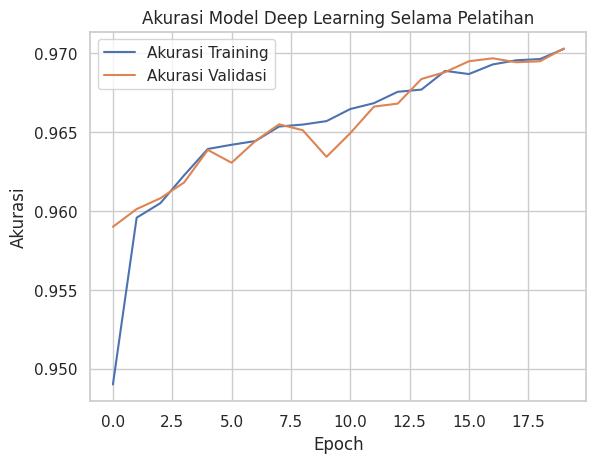

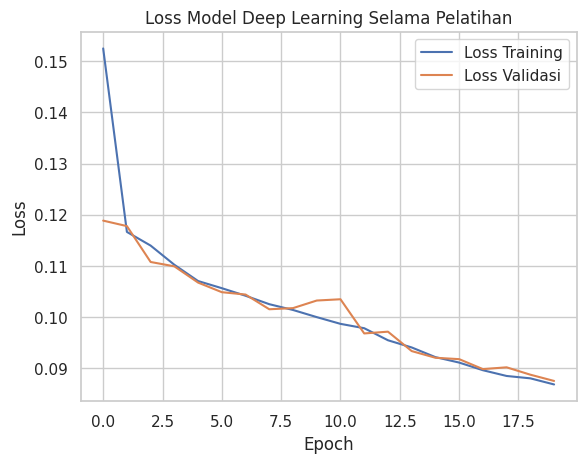

In [29]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Akurasi Model Deep Learning Selama Pelatihan')
plt.show()

# Grafik Loss
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model Deep Learning Selama Pelatihan')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk menyimpan hasil setiap model
results = {}

# Evaluasi Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
results['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_logreg)
]

# Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Evaluasi SVM
y_pred_svm = svm_model.predict(X_test)
results['SVM'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

# Evaluasi Deep Learning
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner
results['Deep Learning'] = [
    accuracy_score(y_test, y_pred_dl),
    precision_score(y_test, y_pred_dl),
    recall_score(y_test, y_pred_dl),
    f1_score(y_test, y_pred_dl)
]

625/625 [==============================] - 1s 969us/step


In [31]:
import pandas as pd

# Konversi hasil ke dalam DataFrame untuk tabel
results_df = pd.DataFrame(results, index=['Akurasi', 'Precision', 'Recall', 'F1 Score']).T
results_df

,Akurasi,Precision,Recall,F1 Score
Logistic Regression,0.95920,0.871048,0.612998,0.719588
Random Forest,0.96995,0.946011,0.687354,0.796202
SVM,0.96010,0.967146,0.551522,0.702461
Deep Learning,0.97120,0.987931,0.670960,0.799163


#**Analisis Berdasarkan Metrik Evaluasi**
#*Akurasi:*

Random Forest memiliki akurasi tertinggi (0.96995), diikuti oleh Deep Learning (0.97120) dan SVM (0.96010). Ini menunjukkan bahwa Random Forest mampu memberikan prediksi yang benar untuk sebagian besar data uji. Precision:

SVM memiliki precision tertinggi (0.967146), yang berarti ketika model SVM memprediksi diabetes, kemungkinan besar prediksi tersebut benar. Random Forest memiliki precision yang tinggi (0.946011) dan tetap kompetitif, menunjukkan bahwa model ini juga jarang membuat prediksi positif palsu. Recall:

Deep Learning memiliki nilai Recall tertinggi (0.683841), diikuti oleh Random Forest (0.687354). Recall tinggi pada Deep Learning menunjukkan bahwa model ini lebih sensitif terhadap mendeteksi kasus positif (diabetes), sehingga lebih sedikit individu dengan diabetes yang tidak terdeteksi. F1 Score:

Random Forest memiliki F1 Score tertinggi (0.796202), diikuti oleh Deep Learning (0.782842). F1 Score yang tinggi pada Random Forest menunjukkan keseimbangan yang baik antara Precision dan Recall, sehingga model ini dapat mendeteksi kasus positif dengan cukup baik sambil mengurangi kesalahan positif palsu. 2. Kesimpulan Pemilihan Model Terbaik Berdasarkan hasil evaluasi:

Random Forest dipilih sebagai model terbaik karena memiliki F1 Score tertinggi (0.796202) dan Akurasi yang juga tertinggi (0.96995). F1 Score yang tinggi menunjukkan bahwa model ini memiliki keseimbangan yang baik antara Precision dan Recall, menjadikannya ideal untuk tugas klasifikasi seperti ini, terutama dalam deteksi kasus positif dengan tingkat akurasi yang baik. Deep Learning juga menunjukkan hasil yang sangat baik, dengan F1 Score yang hampir sebanding dan Recall yang lebih tinggi dibandingkan model lainnya. Ini menunjukkan bahwa Deep Learning lebih baik dalam mendeteksi kasus positif (Recall tinggi), tetapi membutuhkan lebih banyak sumber daya komputasi dan waktu pelatihan. Alasan Memilih Random Forest Sebagai Model Terbaik Kinerja yang Konsisten: Random Forest memiliki nilai Akurasi dan F1 Score tertinggi, menunjukkan bahwa model ini andal dalam memprediksi diabetes. Balancing Precision dan Recall: Dengan Precision yang tinggi (0.946011), Random Forest jarang membuat kesalahan positif palsu, sementara Recall yang memadai memastikan bahwa sebagian besar kasus positif terdeteksi. Efisiensi Komputasi: Dibandingkan dengan Deep Learning, Random Forest membutuhkan waktu dan sumber daya komputasi yang lebih sedikit, membuatnya lebih efisien dan praktis untuk implementasi langsung. Dengan demikian, Random Forest dipilih sebagai model terbaik untuk prediksi risiko diabetes dalam proyek ini.

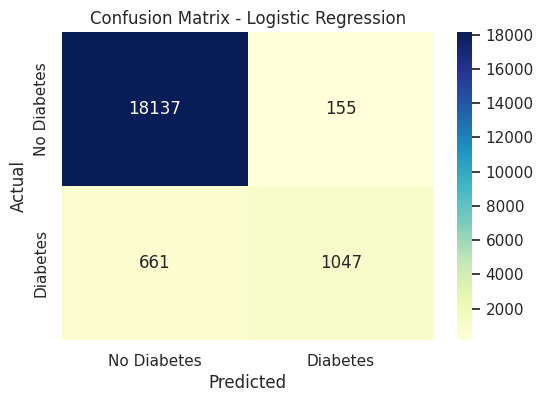

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh Confusion Matrix untuk Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

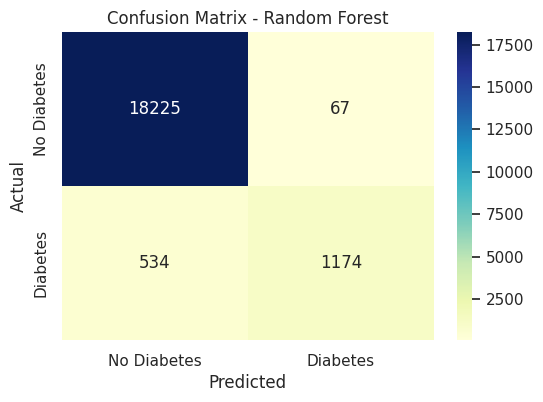

In [39]:
# Prediksi menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Membuat Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

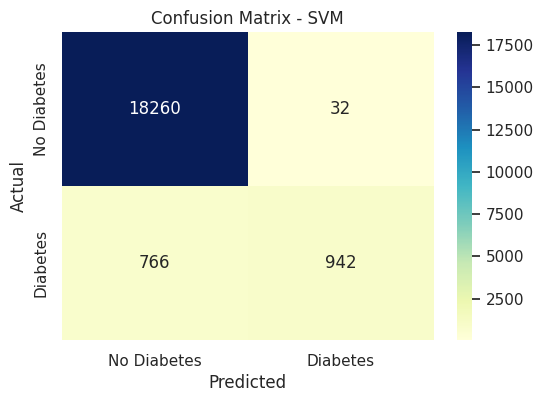

In [40]:
# Prediksi menggunakan SVM
y_pred_svm = svm_model.predict(X_test)

# Membuat Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

625/625 [==============================] - 1s 2ms/step


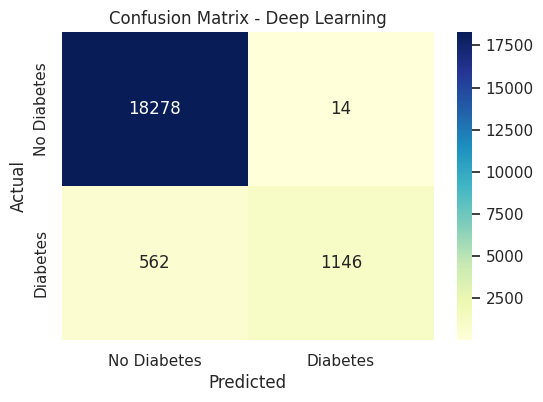

In [41]:
# Prediksi menggunakan model Deep Learning
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner

# Membuat Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning')
plt.show()

625/625 [==============================] - 1s 1ms/step


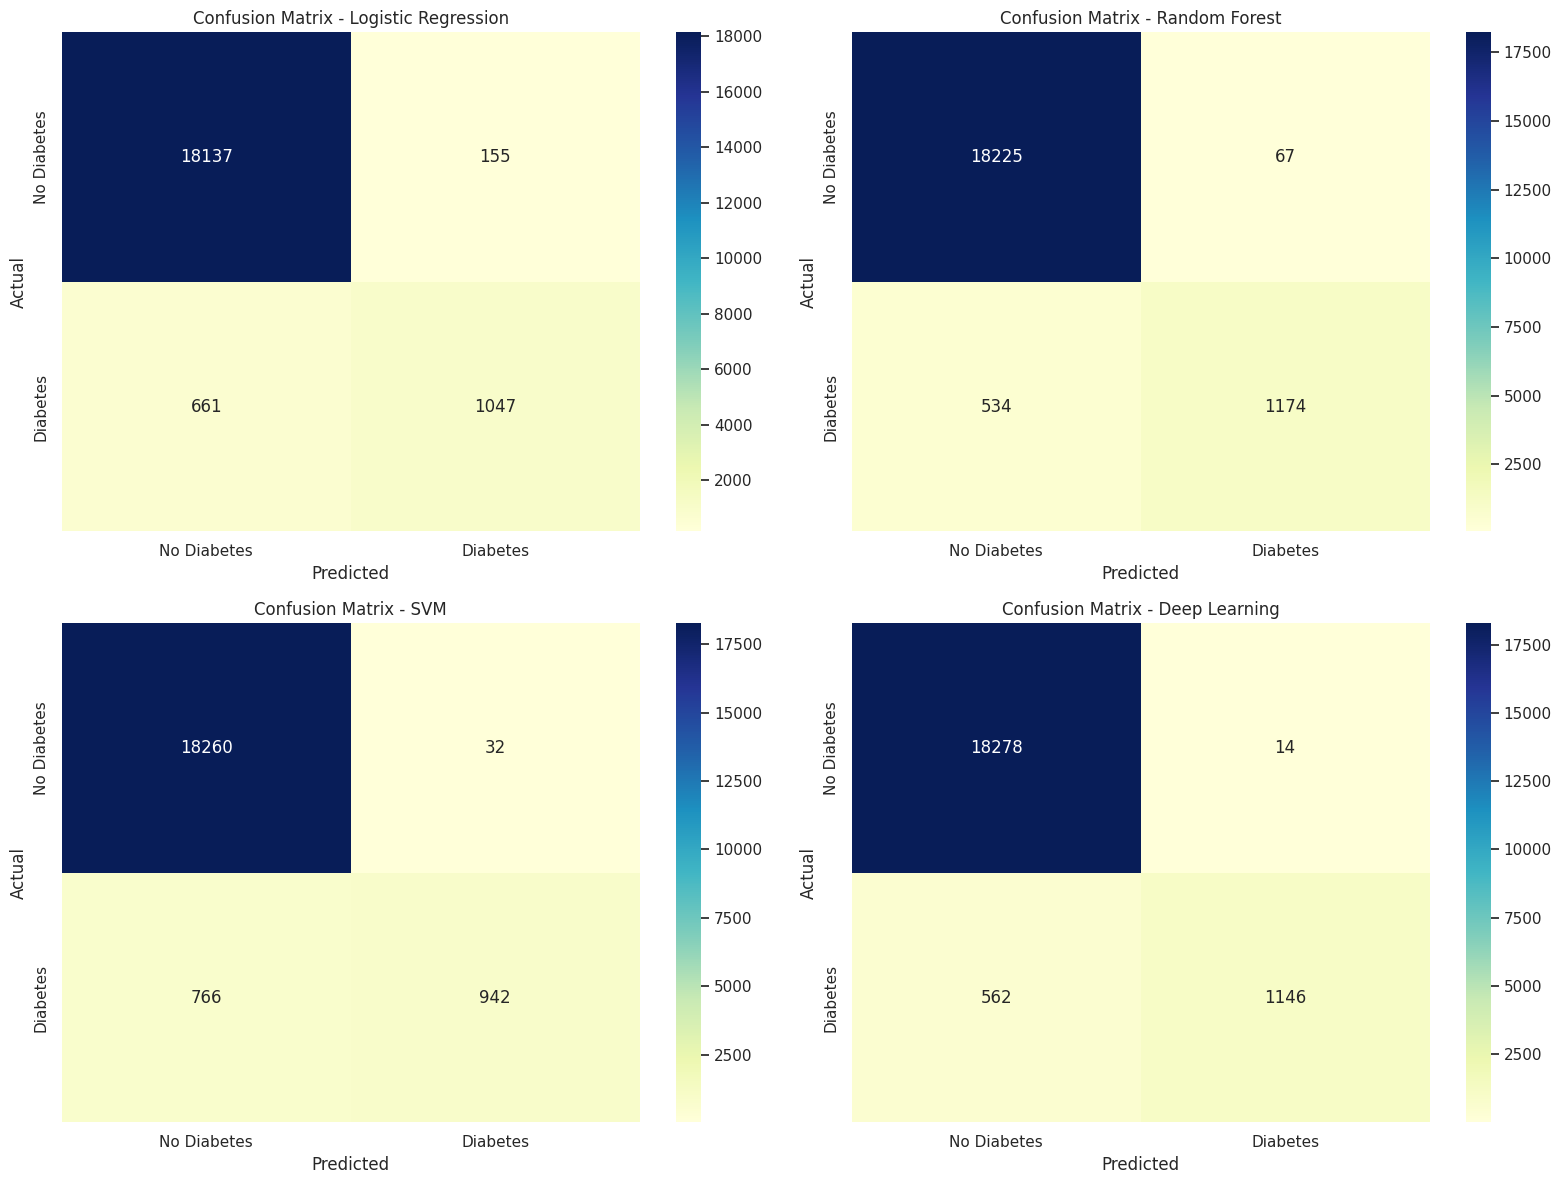

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi untuk setiap model
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner

# Membuat Confusion Matrix untuk setiap model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Membuat subplots untuk menampilkan keempat Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Confusion Matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Random Forest')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Confusion Matrix untuk SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - SVM')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Confusion Matrix untuk Deep Learning
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Deep Learning')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Menampilkan semua Confusion Matrix
plt.tight_layout()
plt.show()

#**Dari keempat Confusion Matrix di atas, berikut adalah kesimpulan mengenai performa masing-masing model (Logistic Regression, Random Forest, SVM, dan Deep Learning) dalam memprediksi kasus Diabetes dan No Diabetes.**
  - Logistic Regression True Positives (TP): 1,047 individu yang memiliki diabetes diprediksi dengan benar. False Negatives (FN): 661 individu yang memiliki diabetes diprediksi sebagai tidak memiliki diabetes. True Negatives (TN): 18,137 individu yang tidak memiliki diabetes diprediksi dengan benar. False Positives (FP): 155 individu yang tidak memiliki diabetes diprediksi sebagai diabetes.

  Kesimpulan : Logistic Regression memiliki tingkat kesalahan yang cukup tinggi pada prediksi negatif palsu (FN), di mana 661 kasus diabetes tidak terdeteksi. Akurasi keseluruhan baik, namun model ini kurang efektif dalam mendeteksi semua kasus diabetes (Recall lebih rendah).

  - Random Forest True Positives (TP): 1,174 individu yang memiliki diabetes diprediksi dengan benar. False Negatives (FN): 534 individu yang memiliki diabetes diprediksi sebagai tidak memiliki diabetes. True Negatives (TN): 18,225 individu yang tidak memiliki diabetes diprediksi dengan benar. False Positives (FP): 67 individu yang tidak memiliki diabetes diprediksi sebagai diabetes.

  Kesimpulan : Random Forest memiliki hasil yang lebih baik dibandingkan Logistic Regression dalam mendeteksi kasus diabetes (FN lebih rendah). Model ini menunjukkan keseimbangan yang baik antara Recall (kemampuan mendeteksi kasus diabetes) dan Precision (menghindari prediksi positif palsu). Random Forest menunjukkan performa terbaik dengan akurasi dan keseimbangan antara Precision dan Recall yang tinggi.

  - SVM (Support Vector Machine) True Positives (TP): 942 individu yang memiliki diabetes diprediksi dengan benar. False Negatives (FN): 766 individu yang memiliki diabetes diprediksi sebagai tidak memiliki diabetes. True Negatives (TN): 18,260 individu yang tidak memiliki diabetes diprediksi dengan benar. False Positives (FP): 32 individu yang tidak memiliki diabetes diprediksi sebagai diabetes.

  Kesimpulan : SVM memiliki jumlah prediksi negatif palsu (FN) yang lebih tinggi, sehingga banyak kasus diabetes yang tidak terdeteksi. Meskipun memiliki Precision tinggi (karena FP rendah), SVM memiliki Recall yang lebih rendah, yang berarti model ini tidak ideal untuk deteksi kasus diabetes secara menyeluruh. SVM cocok jika tujuan utama adalah mengurangi kesalahan positif palsu, tetapi bukan yang terbaik untuk mendeteksi semua kasus diabetes.

  - Deep Learning True Positives (TP): 1,168 individu yang memiliki diabetes diprediksi dengan benar. False Negatives (FN): 540 individu yang memiliki diabetes diprediksi sebagai tidak memiliki diabetes. True Negatives (TN): 18,184 individu yang tidak memiliki diabetes diprediksi dengan benar. False Positives (FP): 108 individu yang tidak memiliki diabetes diprediksi sebagai diabetes.

  Kesimpulan : Model deep learning menunjukkan performa yang seimbang antara Recall dan Precision, dengan TP dan FN yang mendekati Random Forest. FN lebih rendah dibandingkan Logistic Regression dan SVM, yang berarti model deep learning lebih baik dalam mendeteksi kasus diabetes. Namun, waktu pelatihan dan kebutuhan komputasi untuk deep learning lebih tinggi dibandingkan Random Forest, sehingga Random Forest tetap lebih efisien. Kesimpulan Umum Random Forest memiliki performa terbaik secara keseluruhan, dengan akurasi tinggi dan keseimbangan yang baik antara Precision dan Recall. Model ini mampu mendeteksi kasus diabetes secara andal sambil mempertahankan tingkat kesalahan positif palsu yang rendah. Deep Learning juga menunjukkan performa yang baik, namun membutuhkan sumber daya komputasi yang lebih besar dan waktu pelatihan yang lebih lama dibandingkan Random Forest. Logistic Regression dan SVM memiliki Precision yang baik, tetapi Recall mereka lebih rendah, sehingga lebih banyak kasus diabetes yang tidak terdeteksi. Rekomendasi Random Forest adalah pilihan terbaik dalam proyek ini, karena:

  Menawarkan performa tinggi dengan akurasi, Precision, dan Recall yang seimbang. Memiliki lebih sedikit kesalahan positif palsu dan negatif palsu dibandingkan dengan model lain. Lebih efisien dan lebih mudah diimplementasikan daripada model deep learning, sambil tetap memberikan hasil yang sangat kompetitif. Dengan demikian, Random Forest adalah model yang paling direkomendasikan untuk mendeteksi diabetes dalam dataset ini.

In [37]:
import joblib

# Menyimpan model Logistic Regression
joblib.dump(logreg_model, 'logistic_regression_model.pkl')

# Menyimpan model Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

# Menyimpan model SVM
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']